# Logistic Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [4]:
dataset.shape

(400, 3)

In [5]:
dataset.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
dataset.duplicated().sum()

33

In [8]:
dataset.Purchased.unique()

array([0, 1], dtype=int64)

## Splitting the dataset into the Training set and Test set

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 101)

In [9]:
print(X_train)

[[    27  31000]
 [    35  44000]
 [    38  80000]
 [    35  65000]
 [    35  60000]
 [    20  86000]
 [    47 105000]
 [    30  17000]
 [    33  41000]
 [    40  57000]
 [    47  25000]
 [    49  88000]
 [    33  28000]
 [    40  47000]
 [    46  23000]
 [    40  72000]
 [    24  23000]
 [    37  74000]
 [    41  30000]
 [    35 147000]
 [    37  80000]
 [    47 144000]
 [    20  82000]
 [    26  35000]
 [    33  51000]
 [    27 137000]
 [    45  79000]
 [    21  16000]
 [    36 144000]
 [    46  96000]
 [    25  80000]
 [    26  80000]
 [    45 131000]
 [    22  81000]
 [    41  52000]
 [    42  53000]
 [    28  87000]
 [    41  51000]
 [    39  42000]
 [    42 108000]
 [    27  20000]
 [    41  79000]
 [    58 101000]
 [    48 134000]
 [    28  55000]
 [    40  57000]
 [    52 150000]
 [    35  61000]
 [    26  30000]
 [    42  73000]
 [    40  65000]
 [    31  18000]
 [    37  78000]
 [    46  88000]
 [    52  38000]
 [    28  44000]
 [    59  42000]
 [    32  18000]
 [    35  5800

In [10]:
print(y_train)

[0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0
 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1
 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1
 0 0 0 0 0 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 0]


In [11]:
print(X_test)

[[    26  72000]
 [    39  71000]
 [    43 133000]
 [    31  71000]
 [    34  43000]
 [    49  74000]
 [    21  68000]
 [    40  59000]
 [    28  32000]
 [    18  86000]
 [    37 144000]
 [    53 104000]
 [    34 115000]
 [    30  89000]
 [    37  80000]
 [    33  43000]
 [    37 137000]
 [    46  59000]
 [    38  71000]
 [    48  29000]
 [    39 134000]
 [    48 131000]
 [    42  64000]
 [    37  77000]
 [    39  77000]
 [    19  21000]
 [    19  25000]
 [    58  47000]
 [    47  47000]
 [    48  96000]
 [    27  88000]
 [    42  80000]
 [    25  33000]
 [    20  23000]
 [    42 149000]
 [    32 100000]
 [    57 122000]
 [    57  26000]
 [    47  23000]
 [    31  15000]
 [    21  88000]
 [    30  15000]
 [    35  73000]
 [    35  50000]
 [    52 138000]
 [    39  42000]
 [    29  75000]
 [    28  89000]
 [    49  89000]
 [    35  23000]
 [    37  57000]
 [    60 108000]
 [    23  28000]
 [    59  76000]
 [    57  60000]
 [    35  72000]
 [    58 144000]
 [    18  44000]
 [    19  7600

In [12]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 1 0 0]


## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
print(X_train)

[[-1.03893527 -1.12434375]
 [-0.25900263 -0.73854922]
 [ 0.03347211  0.32980486]
 [-0.25900263 -0.11534267]
 [-0.25900263 -0.26372518]
 [-1.72137633  0.50786387]
 [ 0.91089633  1.07171742]
 [-0.74646053 -1.53981478]
 [-0.45398579 -0.82757872]
 [ 0.22845527 -0.35275469]
 [ 0.91089633 -1.30240276]
 [ 1.10587949  0.56721688]
 [-0.45398579 -1.21337325]
 [ 0.22845527 -0.64951971]
 [ 0.81340475 -1.36175576]
 [ 0.22845527  0.09239284]
 [-1.33141001 -1.36175576]
 [-0.06401947  0.15174585]
 [ 0.32594685 -1.15402025]
 [-0.25900263  2.31813051]
 [-0.06401947  0.32980486]
 [ 0.91089633  2.229101  ]
 [-1.72137633  0.38915787]
 [-1.13642685 -1.00563774]
 [-0.45398579 -0.5308137 ]
 [-1.03893527  2.02136549]
 [ 0.71591317  0.30012836]
 [-1.62388475 -1.56949128]
 [-0.16151105  2.229101  ]
 [ 0.81340475  0.8046289 ]
 [-1.23391843  0.32980486]
 [-1.13642685  0.32980486]
 [ 0.71591317  1.84330647]
 [-1.52639317  0.35948136]
 [ 0.32594685 -0.5011372 ]
 [ 0.42343843 -0.4714607 ]
 [-0.94144369  0.53754038]
 

In [16]:
print(X_test)

[[-1.13642685  0.09239284]
 [ 0.13096369  0.06271634]
 [ 0.52093001  1.90265948]
 [-0.64896895  0.06271634]
 [-0.35649421 -0.76822572]
 [ 1.10587949  0.15174585]
 [-1.62388475 -0.02631317]
 [ 0.22845527 -0.29340169]
 [-0.94144369 -1.09466724]
 [-1.91635949  0.50786387]
 [-0.06401947  2.229101  ]
 [ 1.49584581  1.04204091]
 [-0.35649421  1.36848244]
 [-0.74646053  0.59689338]
 [-0.06401947  0.32980486]
 [-0.45398579 -0.76822572]
 [-0.06401947  2.02136549]
 [ 0.81340475 -0.29340169]
 [ 0.03347211  0.06271634]
 [ 1.00838791 -1.18369675]
 [ 0.13096369  1.93233598]
 [ 1.00838791  1.84330647]
 [ 0.42343843 -0.14501917]
 [-0.06401947  0.24077535]
 [ 0.13096369  0.24077535]
 [-1.81886791 -1.42110877]
 [-1.81886791 -1.30240276]
 [ 1.98330371 -0.64951971]
 [ 0.91089633 -0.64951971]
 [ 1.00838791  0.8046289 ]
 [-1.03893527  0.56721688]
 [ 0.42343843  0.32980486]
 [-1.23391843 -1.06499074]
 [-1.72137633 -1.36175576]
 [ 0.42343843  2.37748351]
 [-0.55147737  0.92333491]
 [ 1.88581213  1.57621795]
 

## Training the Logistic Regression model on the Training set

In [17]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [18]:
y_pred = classifier.predict(X_test)

In [19]:
y_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

## Predicting a new result

In [20]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## Predicting the Test set results

In [21]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [1 0]
 [1 0]]


## Making the Confusion Matrix

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[57  8]
 [11 24]]


0.81

## Visualising the Training set results

C:\Users\DevanggiriGoswami\AppData\Local\Temp\ipykernel_7000\2276498564.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


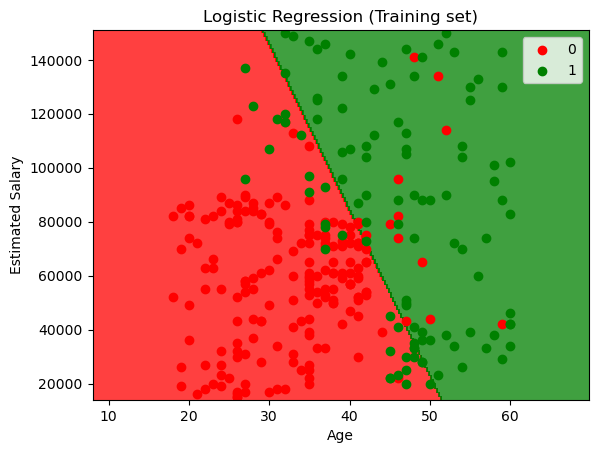

In [23]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

C:\Users\DevanggiriGoswami\AppData\Local\Temp\ipykernel_7000\3848652112.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


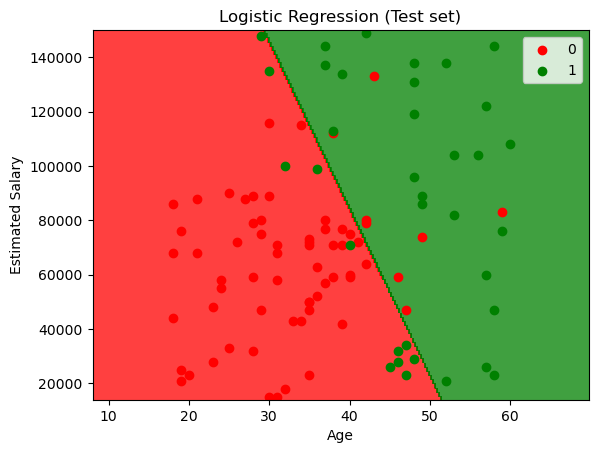

In [24]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()